In [2]:
import pandas as pd

In [3]:
import requests
import csv
import pandas as pd

url = "https://intelifunctiongetdata.azurewebsites.net/api/InteliFunctionGetData"
params = {
    "code": "",
    "table": "sale",
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    # Converter dados JSON para DataFrame do Pandas
    df = pd.DataFrame(data)

    # Salvar DataFrame como arquivo CSV
    df.to_csv('dados_cliente_sale.csv', index=False)

    print("Dados convertidos e salvos como 'dados_cliente_sale.csv'")
else:
    print("Falha ao obter os dados. Código de status:", response.status_code)

Dados convertidos e salvos como 'dados_cliente_sale.csv'


In [4]:
from google.colab import files

# Faça o upload do arquivo para o Colab
files.download('dados_cliente_sale.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df_sale_arquivo = '/content/dados_cliente_sale.csv'
df_sale = pd.read_csv(df_sale_arquivo)
df_sale

,id,cnpj,idCategory,category,saleDate,value,amount
0,639,9245563000114,1,"{'id': 1, 'name': 'Chocolate', 'isActive': True}",2023-10-06T00:00:10.117,495.0,49
1,640,37384125000172,10,"{'id': 10, 'name': 'Batata Palha', 'isActive':...",2023-10-06T00:00:10.21,946.0,10
2,641,46084816000141,17,"{'id': 17, 'name': 'Queijo', 'isActive': True}",2023-10-06T00:00:10.21,906.0,2
3,642,45727411000111,1,"{'id': 1, 'name': 'Chocolate', 'isActive': True}",2023-10-06T00:00:10.21,789.0,67
4,643,43721342000103,24,"{'id': 24, 'name': 'Livro', 'isActive': True}",2023-10-06T00:00:10.21,240.0,13
...,...,...,...,...,...,...,...
33730,34369,35058241000176,6,"{'id': 6, 'name': 'Oleo', 'isActive': True}",2023-11-30T00:00:10.79,722.0,9
33731,34370,12797061000100,30,"{'id': 30, 'name': 'Carne', 'isActive': True}",2023-11-30T00:00:10.79,104.0,91
33732,34371,41430368000177,14,"{'id': 14, 'name': 'Sabão em Pó', 'isActive': ...",2023-11-30T00:00:10.79,367.0,58
33733,34372,17687835000164,28,"{'id': 28, 'name': 'Mouse', 'isActive': True}",2023-11-30T00:00:10.79,179.0,91


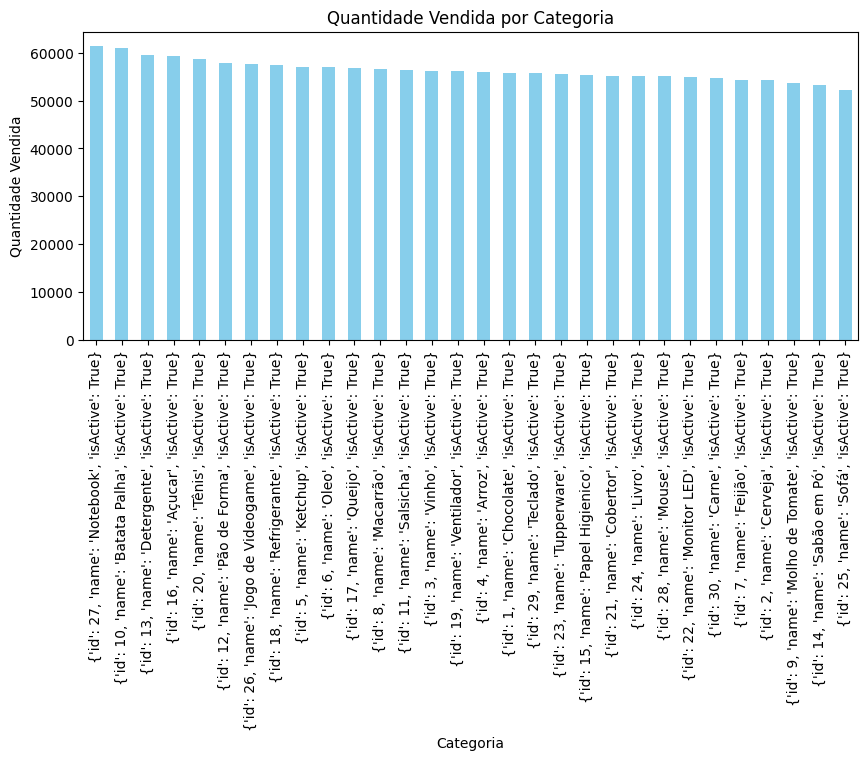

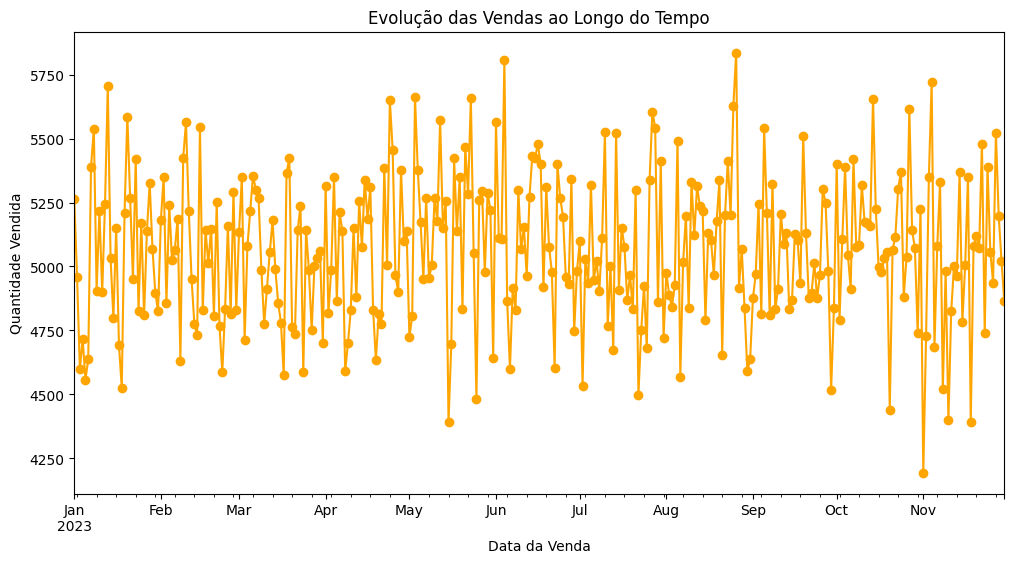

In [6]:
df_sale['saleDate'] = pd.to_datetime(df_sale['saleDate'])

# Gráfico de barras para as categorias e a quantidade vendida
plt.figure(figsize=(10, 4))
df_sale.groupby('category')['amount'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Quantidade Vendida por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.show()

# Gráfico de linha para a evolução das vendas ao longo do tempo
plt.figure(figsize=(12, 6))
df_sale.set_index('saleDate').resample('D')['amount'].sum().plot(style='-o', color='orange')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data da Venda')
plt.ylabel('Quantidade Vendida')
plt.show()

In [7]:
# Convertendo a coluna 'category' para dicionário
df_sale['category'] = df_sale['category'].apply(eval)

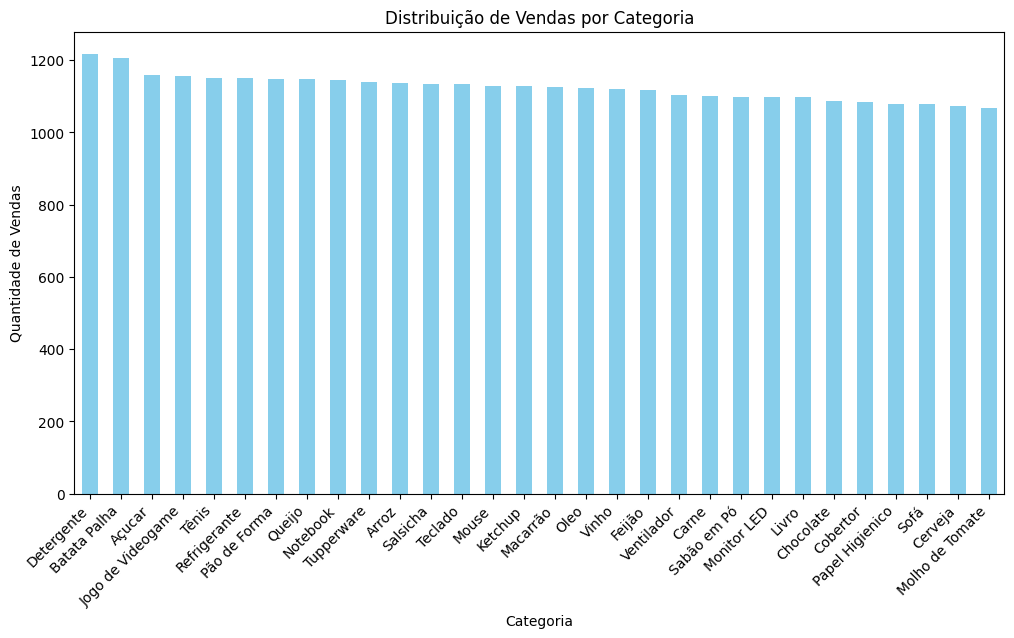

In [8]:
# Gráfico de barras para mostrar a distribuição de vendas por categoria
plt.figure(figsize=(12, 6))
df_sale['category'].apply(lambda x: x['name']).value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

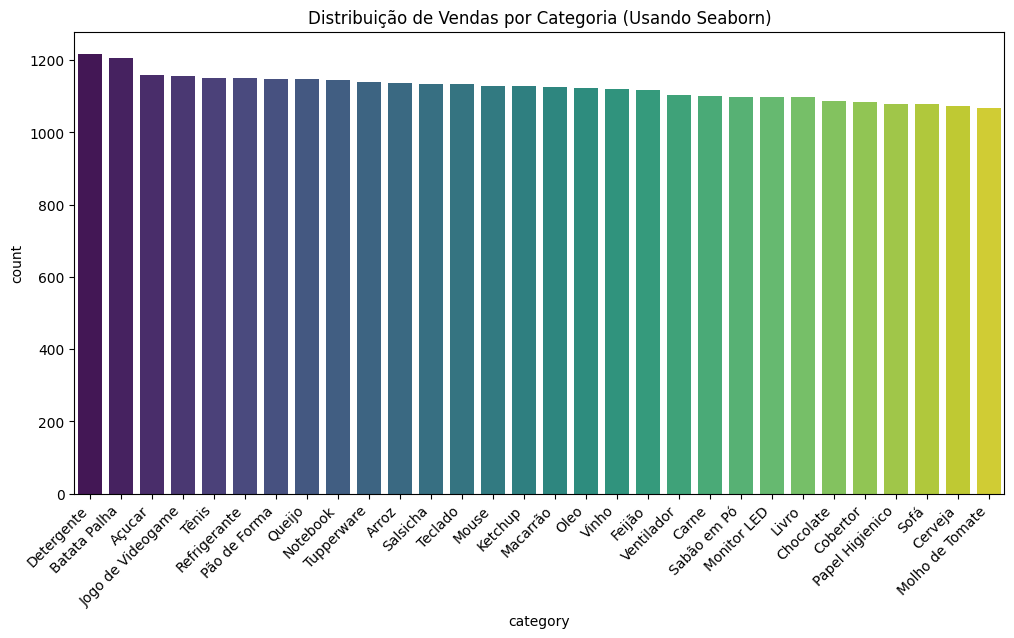

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contando as ocorrências de cada categoria e ordenando os valores
category_counts = df_sale['category'].apply(lambda x: x['name']).value_counts().sort_values(ascending=False)

# Gráfico de barras para mostrar a distribuição de vendas por categoria usando Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sale, x=df_sale['category'].apply(lambda x: x['name']), order=category_counts.index, palette='viridis')
plt.title('Distribuição de Vendas por Categoria (Usando Seaborn)')
plt.xticks(rotation=45, ha='right')
plt.show()

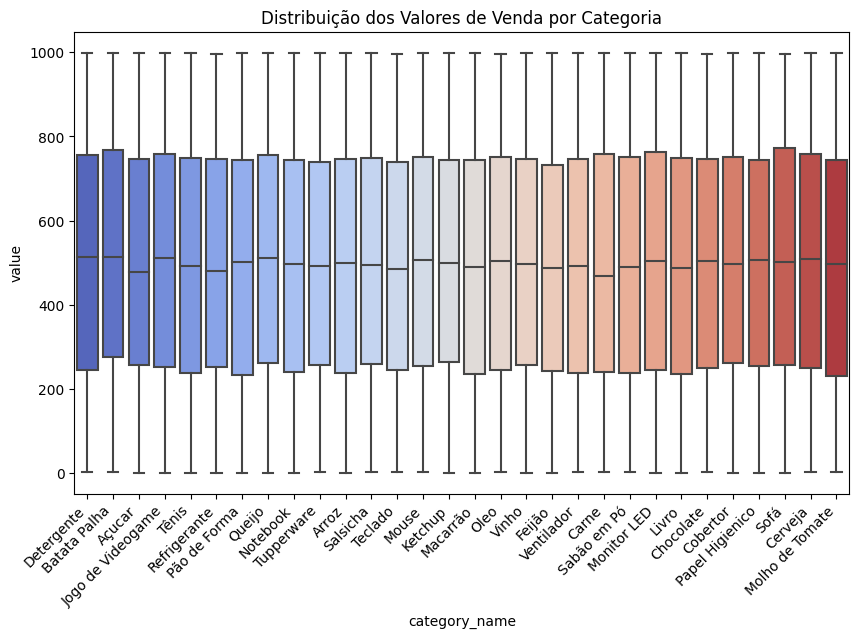

In [10]:
# Extrair o nome da categoria para ordenação no eixo x
df_sale['category_name'] = df_sale['category'].apply(lambda x: x['name'])

# Boxplot para visualizar a distribuição dos valores de venda por categoria
plt.figure(figsize=(10, 6))
sns.boxplot(x='category_name', y='value', data=df_sale, palette='coolwarm', order=df_sale['category_name'].value_counts().index)
plt.title('Distribuição dos Valores de Venda por Categoria')
plt.xticks(rotation=45, ha='right')
plt.show()

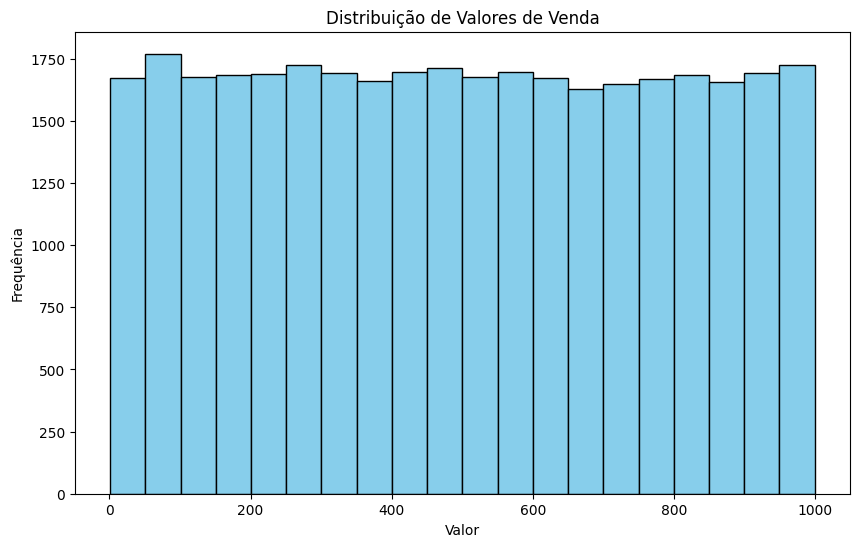

In [11]:
# Histograma para visualizar a distribuição de valores de venda
plt.figure(figsize=(10, 6))
plt.hist(df_sale['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Valores de Venda')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

<ipython-input-23-d939aa910611>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='amount', data=df_chocolate, palette='viridis', ci=None)


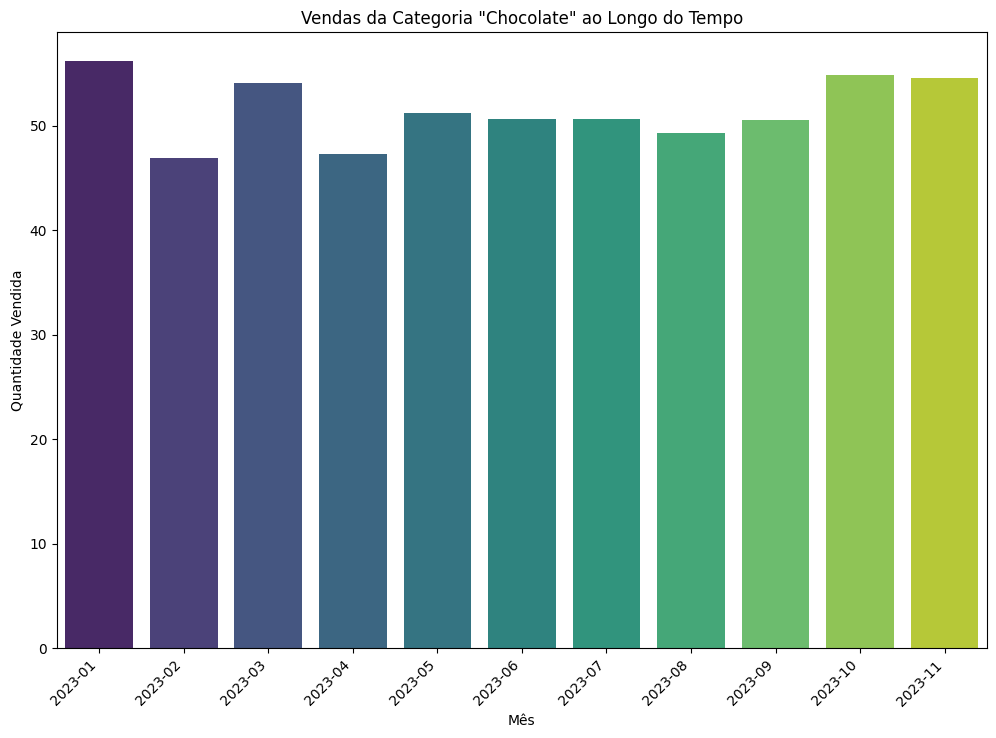

In [23]:
# Criando uma coluna de mês
df_sale['month'] = pd.to_datetime(df_sale['saleDate']).dt.to_period('M')

# Filtrando os dados para incluir apenas a categoria "Chocolate"
df_chocolate = df_sale[df_sale['category_name'] == 'Chocolate']

# Ordenando o DataFrame pela coluna 'saleDate'
df_chocolate = df_chocolate.sort_values(by='saleDate')

# Gráfico de barras para mostrar as vendas da categoria "Chocolate" ao longo do tempo
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='amount', data=df_chocolate, palette='viridis', ci=None)
plt.title('Vendas da Categoria "Chocolate" ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
import requests
import csv
import pandas as pd

url = "https://intelifunctiongetdata.azurewebsites.net/api/InteliFunctionGetData"
params = {
    "code": "",
    "table": "category",
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    # Converter dados JSON para DataFrame do Pandas
    df = pd.DataFrame(data)

    # Salvar DataFrame como arquivo CSV
    df.to_csv('dados_cliente_category.csv', index=False)

    print("Dados convertidos e salvos como 'dados_cliente_category.csv'")
else:
    print("Falha ao obter os dados. Código de status:", response.status_code)

Dados convertidos e salvos como 'dados_cliente_category.csv'


In [14]:
df_category_arquivo = '/content/dados_cliente_category.csv'
df_category = pd.read_csv(df_category_arquivo)
df_category

,id,name,isActive
0,1,Chocolate,True
1,2,Cerveja,True
2,3,Vinho,True
3,4,Arroz,True
4,5,Ketchup,True
5,6,Oleo,True
6,7,Feijão,True
7,8,Macarrão,True
8,9,Molho de Tomate,True
9,10,Batata Palha,True


In [15]:
import requests
import csv
import pandas as pd

url = "https://intelifunctiongetdata.azurewebsites.net/api/InteliFunctionGetData"
params = {
    "code": "",
    "table": "establishment",
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    # Converter dados JSON para DataFrame do Pandas
    df = pd.DataFrame(data)

    # Salvar DataFrame como arquivo CSV
    df.to_csv('dados_cliente_establishment.csv', index=False)

    print("Dados convertidos e salvos como 'dados_cliente_establishment.csv'")
else:
    print("Falha ao obter os dados. Código de status:", response.status_code)

Dados convertidos e salvos como 'dados_cliente_establishment.csv'


In [16]:
# Faça o upload do arquivo para o Colab
files.download('dados_cliente_establishment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
df_establishment_arquivo = '/content/dados_cliente_establishment.csv'
df_establishment = pd.read_csv(df_establishment_arquivo)
df_establishment

,id,cnpj
0,1048582,97253082000207
1,1048583,3151122000177
2,1048584,27738772000181
3,1048585,17096193000129
4,1048586,23202167000130
...,...,...
1048570,2097152,10370102000152
1048571,2097153,28367939000108
1048572,2097154,19404867000130
1048573,2097155,40065730000195
